In [74]:
import pandas as pd
import numpy as np
#https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from itertools import chain,cycle
from IPython.display import display, HTML, display_html
import matplotlib.pyplot as plt

display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

In [75]:
%matplotlib notebook
"""
https://nbviewer.org/ copy and paste URL address at 
this link in order to have a reliable view of the code
"""
plt.rcParams [ 'axes.labelsize' ] = 14
plt.rcParams [ 'lines.linewidth' ] = 2
plt.rcParams [ 'figure.figsize' ] = ( 12 , 4)
plt.rcParams [ 'font.size' ] = 9




class plotSett:
    def __init__(self, fig, plt = plt, font = 20, title = 'Title', fontx = None, fonty = None):
        self.font = font
        self.title = title
        self.fig = fig
        self.ax = self.fig.add_subplot(111)
        
        if fontx == None:
            fontx = self.font
        if fonty == None:
            fonty = self.font
        

        self.ax.set_title(title, fontdict={'fontsize': self.font })
        self.ax.xaxis.set_tick_params(labelsize = fontx)
        self.ax.yaxis.set_tick_params(labelsize = fonty)
        
    def grid(self, xmin = 0, xmax = 1, xstepM = 0.1, xstepm = 0.05, \
             ymin = 0, ymax = 1, ystepM = 0.1, ystepm = 0.05,\
             sizeMinor = 0.2, sizeMajor = 1): # line size

        Xmajor_ticks = np.arange(xmin, xmax, xstepM)
        Xminor_ticks = np.arange(xmin, xmax, xstepm)
        Ymajor_ticks = np.arange(ymin, ymax, ystepM)
        Yminor_ticks = np.arange(ymin, ymax, ystepm)

        self.ax.set_xlim(xmin, xmax)
        self.ax.set_xticks(Xmajor_ticks)
        self.ax.set_xticks(Xminor_ticks, minor=True)
    
        self.ax.set_ylim(ymin, ymax)
        self.ax.set_yticks(Ymajor_ticks)
        self.ax.set_yticks(Yminor_ticks, minor=True)

        # And a corresponding grid
        #self.ax.grid(which='both')
        self.ax.grid(which='minor', alpha=0.2)
        self.ax.grid(which='major', alpha=0.5)

In [76]:
def dfDisplay(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

<h4> Perceptron </h4>

In [77]:
class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    -------------
    eta: float
        Learning rage (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    
    Attributes
    -------------
    w_: 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassfications in every epoch
    """
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<h4> Import flowers specs </h4>

In [78]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path, header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),\
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y = X[y == c1, 1],\
                   alpha = 0.8, c = cmap(idx),\
                   marker = markers[idx], label = c1)

<IPython.core.display.Javascript object>


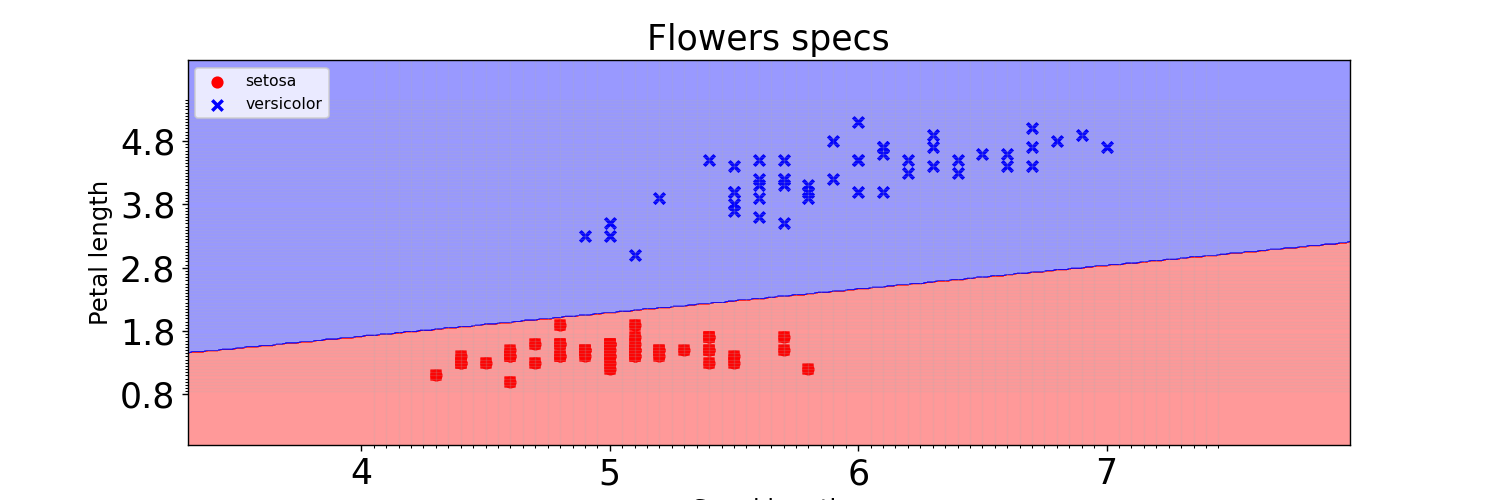

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [84]:
y = df.iloc[0:100, 4].values

y = np.where( y == 'Iris-setosa', -1, 1 )
X = df.iloc[0:100, [0, 2]].values

fig = plt.figure()
a = plotSett(fig = fig, title = 'Flowers specs')
u = a.grid(4, 7.5, 1, 0.05, 0.8, 5.5, 1, 0.05)

plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

plot_decision_regions(X, y, classifier = ppn)

<h4> Running perceptron code </h4>

<IPython.core.display.Javascript object>


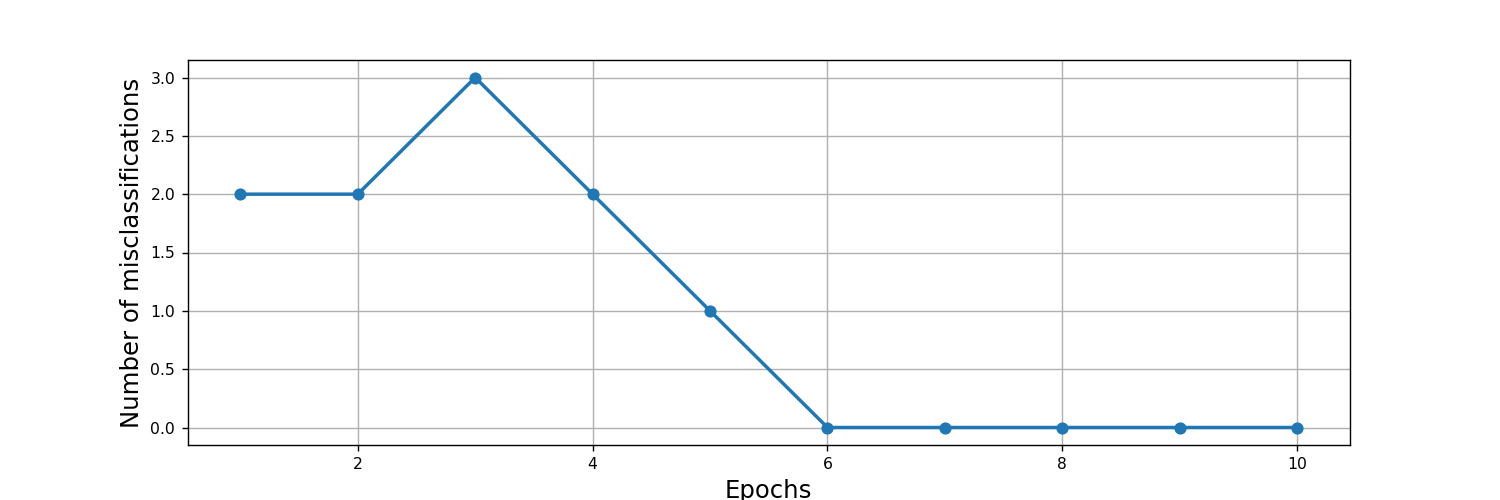

In [83]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
fig2 = plt.figure()
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.grid()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
